# Funções Espaciais

## Medidas - Área

Método: area

In [63]:
%matplotlib inline
import geopandas as gpd

bairros = gpd.read_file("data/BAIRRO_POPULAR.shp")


In [64]:
bairros.head()

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry
0,207.0,834.0,Jardim Felicidade,0.811,4484.895,"POLYGON ((611893.011 7806896.643, 612006.128 7..."
1,177.0,802.0,Solimões,0.280,2459.134,"POLYGON ((612143.299 7807875.069, 612149.121 7..."
2,130.0,750.0,Planalto,2.500,10097.252,"POLYGON ((609676.978 7807928.199, 609688.638 7..."
3,447.0,1456.0,Vila Primeiro de Maio,0.164,1955.317,"POLYGON ((612124.984 7803221.641, 612090.731 7..."
4,200.0,827.0,Trevo,1.916,8063.288,"POLYGON ((603126.658 7806926.049, 603127.903 7..."


In [65]:
bairros.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [66]:
bairros['area_gp'] = bairros['geometry'].area/1000000

In [67]:
bairros.head()

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry,area_gp
0,207.0,834.0,Jardim Felicidade,0.811,4484.895,"POLYGON ((611893.011 7806896.643, 612006.128 7...",0.811167
1,177.0,802.0,Solimões,0.280,2459.134,"POLYGON ((612143.299 7807875.069, 612149.121 7...",0.279509
2,130.0,750.0,Planalto,2.500,10097.252,"POLYGON ((609676.978 7807928.199, 609688.638 7...",2.499592
3,447.0,1456.0,Vila Primeiro de Maio,0.164,1955.317,"POLYGON ((612124.984 7803221.641, 612090.731 7...",0.163855
4,200.0,827.0,Trevo,1.916,8063.288,"POLYGON ((603126.658 7806926.049, 603127.903 7...",1.915798


## Medidas - Perímetro

Método: length

In [68]:
bairros['peri_gp'] = bairros['geometry'].length
bairros.head()

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry,area_gp,peri_gp
0,207.0,834.0,Jardim Felicidade,0.811,4484.895,"POLYGON ((611893.011 7806896.643, 612006.128 7...",0.811167,4484.894690
1,177.0,802.0,Solimões,0.280,2459.134,"POLYGON ((612143.299 7807875.069, 612149.121 7...",0.279509,2459.134235
2,130.0,750.0,Planalto,2.500,10097.252,"POLYGON ((609676.978 7807928.199, 609688.638 7...",2.499592,10097.252360
3,447.0,1456.0,Vila Primeiro de Maio,0.164,1955.317,"POLYGON ((612124.984 7803221.641, 612090.731 7...",0.163855,1955.317299
4,200.0,827.0,Trevo,1.916,8063.288,"POLYGON ((603126.658 7806926.049, 603127.903 7...",1.915798,8063.287757


## Medidas - Centroide

Método: centroid

In [69]:
bairros['centroide'] = bairros['geometry'].centroid
bairros.head()

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry,area_gp,peri_gp,centroide
0,207.0,834.0,Jardim Felicidade,0.811,4484.895,"POLYGON ((611893.011 7806896.643, 612006.128 7...",0.811167,4484.894690,POINT (612296.309 7807187.614)
1,177.0,802.0,Solimões,0.280,2459.134,"POLYGON ((612143.299 7807875.069, 612149.121 7...",0.279509,2459.134235,POINT (612462.600 7807826.143)
2,130.0,750.0,Planalto,2.500,10097.252,"POLYGON ((609676.978 7807928.199, 609688.638 7...",2.499592,10097.252360,POINT (610026.209 7806574.613)
3,447.0,1456.0,Vila Primeiro de Maio,0.164,1955.317,"POLYGON ((612124.984 7803221.641, 612090.731 7...",0.163855,1955.317299,POINT (611918.829 7803480.121)
4,200.0,827.0,Trevo,1.916,8063.288,"POLYGON ((603126.658 7806926.049, 603127.903 7...",1.915798,8063.287757,POINT (603729.938 7806483.275)


<Axes: >

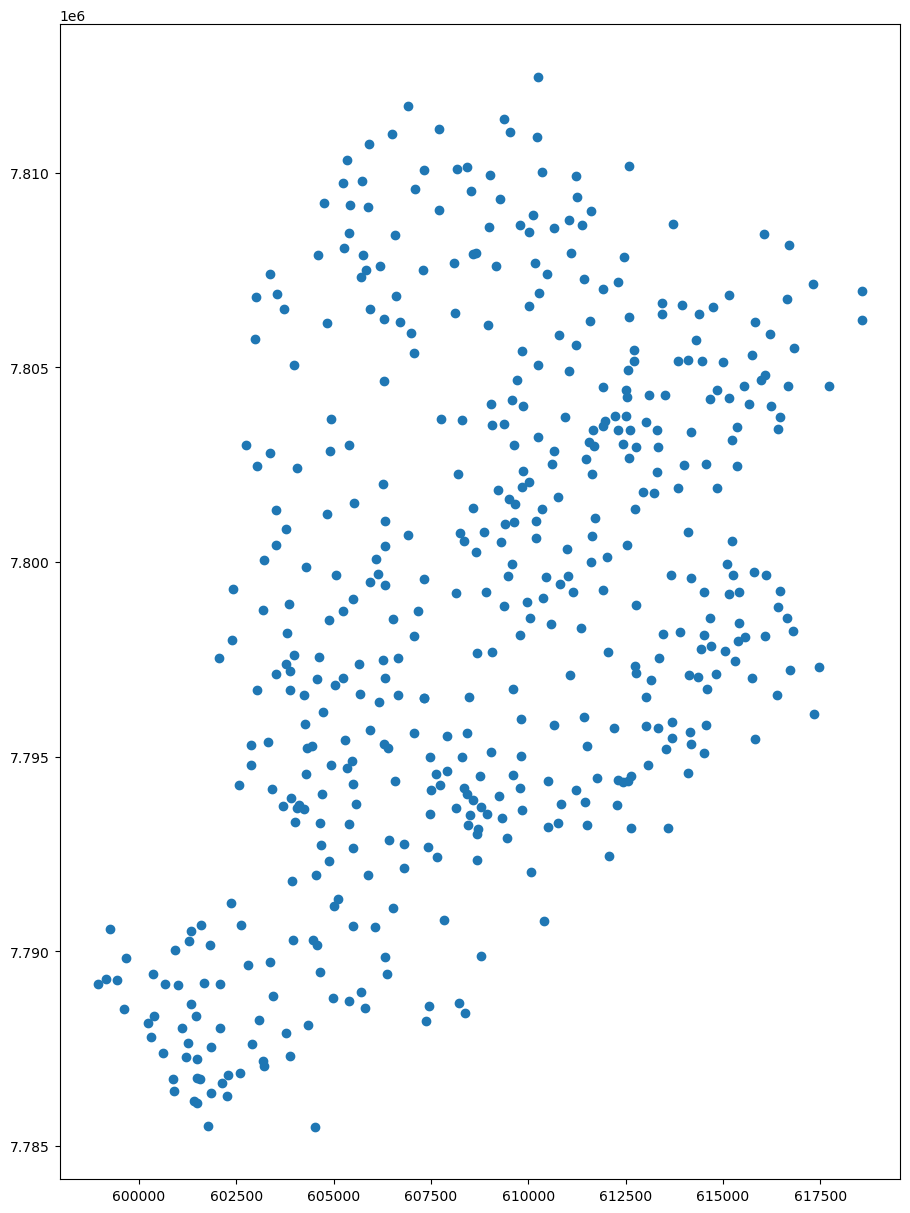

In [70]:
bairros['centroide'].plot(figsize=(15,15))

In [71]:
limite = gpd.read_file("data/LIMITE_MUNICIPIO.shp")

<Axes: >

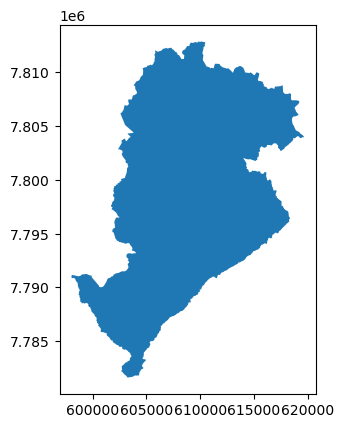

In [72]:
limite.plot()

In [73]:
centro_bh=limite.centroid
centro_bh = centro_bh.iloc[0]

In [74]:
type(centro_bh)

shapely.geometry.point.Point

## Medidas - Distância Euclidiana

Método: distance

In [75]:
bairros["distancia"] = bairros["centroide"].distance(centro_bh)
bairros.head()

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry,area_gp,peri_gp,centroide,distancia
0,207.0,834.0,Jardim Felicidade,0.811,4484.895,"POLYGON ((611893.011 7806896.643, 612006.128 7...",0.811167,4484.894690,POINT (612296.309 7807187.614),8919.753945
1,177.0,802.0,Solimões,0.280,2459.134,"POLYGON ((612143.299 7807875.069, 612149.121 7...",0.279509,2459.134235,POINT (612462.600 7807826.143),9573.553348
2,130.0,750.0,Planalto,2.500,10097.252,"POLYGON ((609676.978 7807928.199, 609688.638 7...",2.499592,10097.252360,POINT (610026.209 7806574.613),7708.142524
3,447.0,1456.0,Vila Primeiro de Maio,0.164,1955.317,"POLYGON ((612124.984 7803221.641, 612090.731 7...",0.163855,1955.317299,POINT (611918.829 7803480.121),5459.933795
4,200.0,827.0,Trevo,1.916,8063.288,"POLYGON ((603126.658 7806926.049, 603127.903 7...",1.915798,8063.287757,POINT (603729.938 7806483.275),9112.833253


In [76]:
bairros["distancia"].mean()

7170.961984729113

In [77]:
bairros["distancia"].max()

15198.37754025002

In [78]:
bairros["distancia"].min()

281.24222340987563